# DATA EXPLORATION GAS SALES

In [260]:
import os
import pandas as pd
from typing import List

In [261]:
# Define folder path
DATA_FOLDER_PATH = f"{os.path.dirname(os.getcwd())}/data/raw/"
GAS_DATA_FOLDER_PATH = f"{DATA_FOLDER_PATH}/gas/"

In [262]:
# Sample file path
DATA_FILE_PATH_BY_YEAR = os.path.join(GAS_DATA_FOLDER_PATH, '2019')
FILES = os.listdir(DATA_FILE_PATH_BY_YEAR)
DEMO_DATA_FILE_PATH = os.path.join(DATA_FILE_PATH_BY_YEAR, FILES[0])
print(DEMO_DATA_FILE_PATH)


/mnt/c/Users/arios/Documents/repositories/gas-sales-prediction/data/raw//gas/2019/Abr 2019 ATQ Y EC.csv


In [263]:
# Read df
sample_df = pd.read_csv(DEMO_DATA_FILE_PATH, low_memory=False, thousands=',')
sample_df.head(10)

,Empresa,Region,Filial,Tipo,Punto de venta,%Key_Cliente,%Key_FechaID,%Key_Folio,%Key_Ticket,Litros,$
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2217649,19879205
1,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190404.0,3000-5268-4363-2000-54D6,yxF0SM,43,396
2,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190410.0,3000-5268-A414-1800-555C,yxFJCF,8,78
3,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190410.0,3000-5268-A418-C800-555D,yxFJCG,6,51
4,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190411.0,3000-5268-B506-D800-5574,yxFNUJ,72,661
5,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190413.0,3000-5268-D4AA-6800-55A4,yxFTHO,17,158
6,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190413.0,3000-5268-D70D-C800-55B2,yxFTIP,29,263
7,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190413.0,3000-5268-D714-D000-55B3,yxFTIT,72,661
8,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190414.0,3000-5268-E46E-C000-55BA,yxFVJV,20,185
9,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190415.0,3000-5268-F50D-1800-55D2,yxFZPQ,8,78


In [264]:
# Show info
print(sample_df.shape)
sample_df.info()

(314897, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314897 entries, 0 to 314896
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Empresa         314896 non-null  object 
 1   Region          314896 non-null  object 
 2   Filial          314896 non-null  object 
 3   Tipo            314896 non-null  object 
 4   Punto de venta  314896 non-null  object 
 5   %Key_Cliente    314896 non-null  object 
 6   %Key_FechaID    314896 non-null  float64
 7   %Key_Folio      314896 non-null  object 
 8   %Key_Ticket     314896 non-null  object 
 9   Litros          314897 non-null  int64  
 10  $               314897 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.4+ MB


In [265]:
# Remove totals
def remove_totals(data_df: pd.DataFrame, column: str) -> pd.DataFrame:
    filtered_df = data_df[data_df[column].notna()]
    return filtered_df

sample_df = remove_totals(sample_df,"Filial")
sample_df.shape

(314896, 11)

In [266]:
# Convert type
sample_df.convert_dtypes()

,Empresa,Region,Filial,Tipo,Punto de venta,%Key_Cliente,%Key_FechaID,%Key_Folio,%Key_Ticket,Litros,$
1,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190404,3000-5268-4363-2000-54D6,yxF0SM,43,396
2,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190410,3000-5268-A414-1800-555C,yxFJCF,8,78
3,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190410,3000-5268-A418-C800-555D,yxFJCG,6,51
4,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190411,3000-5268-B506-D800-5574,yxFNUJ,72,661
5,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,ALAMO,Autotanque,ATQ. ALA 05,A01463,20190413,3000-5268-D4AA-6800-55A4,yxFTHO,17,158
...,...,...,...,...,...,...,...,...,...,...,...
314892,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Sur,TAMPICO,Autotanque,ATQ. TAMP 19 (029),TC0002,20190404,3001-3268-45DA-3800-2E27,yykB6Z,46,422
314893,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Sur,TAMPICO,Autotanque,ATQ. TAMP 19 (029),TC0002,20190404,3001-3268-45F6-5000-2E28,yykB71,6,53
314894,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Sur,TAMPICO,Autotanque,ATQ. TAMP 19 (029),TC0002,20190404,3001-3268-4614-9000-2E29,yykB72,9,80
314895,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Sur,TAMPICO,Autotanque,ATQ. TAMP 19 (029),TC0002,20190404,3001-3268-46C1-D000-2E2A,yykB74,15,133


In [267]:
# Get date
def keydate_to_date(data_df: pd.DataFrame, column: str = "%Key_FechaID") -> pd.Series:
    date_series = pd.to_datetime(data_df[column].astype(str), format = "%Y%m%d")
    return date_series

sample_df["Date"] = keydate_to_date(sample_df, "%Key_FechaID")

In [268]:
# Remove columns
COLUMNS_TO_REMOVE = ["Empresa", "%Key_Ticket","%Key_Folio", "%Key_Cliente", "%Key_FechaID"]
sample_df.drop(columns = COLUMNS_TO_REMOVE, inplace=True)
sample_df.sample(5)

,Region,Filial,Tipo,Punto de venta,Litros,$,Date
276369,Sur,TAMPICO,Autotanque,ATQ. TAMP 14 (023),6,53,2019-04-16
68275,Oeste,MATEHUALA,Autotanque,ATQ. MATEH 87,2,24,2019-04-05
288232,Sur,TAMPICO,Autotanque,ATQ. TAMP 61 (034),2,22,2019-04-06
29405,Este,GALEANA,Autotanque,ATQ. 207,8,66,2019-04-23
285872,Sur,TAMPICO,Autotanque,ATQ. TAMP 07 (025),4,41,2019-04-04


In [269]:
file_filters = os.path.join(DATA_FOLDER_PATH, 'filiales_estados.csv')
filters_df = pd.read_csv(file_filters, low_memory=False, thousands=',')
sample_df = pd.merge(filters_df, sample_df, on="Filial")
sample_df.sample(5)

,Filial,Estado,Region,Tipo,Punto de venta,Litros,$,Date
110945,REYNOSA,TAMAULIPAS,Centro,Autotanque,ATQ. REY 20,8,65,2019-04-15
98254,REYNOSA,TAMAULIPAS,Centro,Autotanque,ATQ. 75,3,28,2019-04-01
158373,RIO VERDE,SAN LUIS POTOSI,Oeste,Estacion de Carburacion,EC. RIO VERDE,3,26,2019-04-28
104776,REYNOSA,TAMAULIPAS,Centro,Autotanque,ATQ. REY 15,3,24,2019-04-11
237963,SANTA CATARINA,NUEVO LEON,Centro,Autotanque,ATQ. SCAT 49,3,26,2019-04-06


In [270]:
# Filter by state (NUEVO LEON, TAMAULIPAS)
def filter_by_state(data_df: pd.DataFrame, states: List[str] = ["NUEVO LEON", "TAMAULIPAS"]):
    filtered_df = data_df[data_df["Estado"].isin(states)]
    filtered_df.reset_index(drop=True)
    return filtered_df

sample_df = filter_by_state(sample_df)
print(sample_df.shape)
sample_df.sample(5)


(222332, 8)


,Filial,Estado,Region,Tipo,Punto de venta,Litros,$,Date
18184,ALLENDE,NUEVO LEON,Este,Autotanque,ATQ. ALL 11,3,27,2019-04-27
266069,TAMPICO,TAMAULIPAS,Sur,Autotanque,ATQ. TAMP 16 (027),4,39,2019-04-06
239517,SANTA CATARINA,NUEVO LEON,Centro,Autotanque,ATQ. SCAT 76,3,24,2019-04-12
126221,REYNOSA,TAMAULIPAS,Centro,Estacion de Carburacion,EC SAN VALENTIN,3,26,2019-04-23
46396,LINARES,NUEVO LEON,Este,Estacion de Carburacion,LINARES 2,9,78,2019-04-09


In [271]:
def process_year_data(input_data_path: str, year: str, output_path: str = "output/") -> pd.DataFrame:
    # Init year_df
    df_year = pd.DataFrame([])
    # Define paths
    year_data_path = f"{input_data_path}/{year}"
    output_path = f"{output_path}/{year}"
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    # Read filial-state data
    file_filters = os.path.join(DATA_FOLDER_PATH, 'filiales_estados.csv')
    filters_df = pd.read_csv(file_filters, low_memory=False, thousands=',')
    # Get gas year data
    year_files = os.listdir(year_data_path)
    # Read each file in year

    for file in year_files:
        # Read month file
        file_path = os.path.join(year_data_path, file)
        m_df = pd.read_csv(file_path, low_memory=False, thousands=',')
        # Remove totals
        m_df = remove_totals(m_df, "Filial")
        # Fix dtypes
        m_df.convert_dtypes()
        # Set state
        m_df = pd.merge(filters_df, m_df, on="Filial")
        # Filter data by state
        m_df = filter_by_state(m_df)
        # Convert date
        m_df["Date"] = keydate_to_date(m_df, "%Key_FechaID")
        # Remove unnecesary columns
        m_df.drop(columns = COLUMNS_TO_REMOVE, inplace=True)
        # Export data
        m_df.to_csv(f'{output_path}/{file}')
        # Append data
        # df_year = df_year.append(m_df)
        df_year = pd.concat([df_year, m_df], ignore_index=True)
    # df_year.to_csv(f'{output_path}/{year}.csv')
    df_year.sort_values(['Date'], ascending=[True], inplace=True)
    return df_year
 

year_sample = process_year_data(GAS_DATA_FOLDER_PATH, "2022")
print(year_sample.shape)
year_sample.head(5)

(1028474, 8)


,Filial,Estado,Region,Tipo,Punto de venta,Litros,$,Date
239890,ALAMO,NUEVO LEON,Este,AtqGas,ATQ. ALA 01,3,40,2022-01-01
282853,LINARES,NUEVO LEON,Este,EC,E.C. NOGALES,1,7,2022-01-01
282854,LINARES,NUEVO LEON,Este,EC,E.C. NOGALES,0,5,2022-01-01
282855,LINARES,NUEVO LEON,Este,EC,E.C. NOGALES,0,3,2022-01-01
282856,LINARES,NUEVO LEON,Este,EC,E.C. NOGALES,4,53,2022-01-01


In [272]:
YEARS: List[int] = [2017, 2018, 2019, 2020, 2021, 2022]
def get_all_years(input_data_path: str, years: List[str], output_path: str = "output/") -> pd.DataFrame:
    # Init data_df
    full_data_df = pd.DataFrame([])
    for year in years:
        year_df = process_year_data(input_data_path, year, output_path)
        full_data_df = pd.concat([full_data_df, year_df], ignore_index=True)
    # df_year.to_csv(f'{output_path}/{year}.csv')
    full_data_df.sort_values(['Date'], ascending=[True], inplace=True)
    return full_data_df


full_data = get_all_years(GAS_DATA_FOLDER_PATH, YEARS)
print(full_data.shape)
full_data.head(5)

In [ ]:
atq_df = full_data[full_data["Punto de venta"].str.startswith("ATQ")]
print(atq_df["Tipo"].unique())
ec_df = full_data[full_data["Punto de venta"].str.startswith("EC")]
print(ec_df["Tipo"].unique())
other_points_df = full_data[~full_data["Punto de venta"].str.startswith(("EC","ATQ"))]
print(other_points_df["Tipo"].unique())


[nan 'Autotanque' 'AtqGas']
[nan 'Estacion de Carburacion' 'EC']
[nan 'Estacion de Carburacion' 'EC' 'AtqGas']


In [ ]:
def get_sale_type(sale_point: str) -> str:
    if sale_point.startswith("ATQ"):
        sale_type = "ATQ"
    else:
        sale_type = "EC"
    return sale_type

full_data["Tipo"] = full_data["Punto de venta"].apply(lambda x: get_sale_type(x))
full_data.head(5)

,Filial,Estado,Region,Punto de venta,Litros,$,Date,Tipo
0,SAN NICOLAS,NUEVO LEON,Centro,E.C. MEZQUITAL,5,42,2017-01-01,EC
1029,TAMPICO,TAMAULIPAS,Oeste,ATQ. TAMP 75 (050),3,27,2017-01-01,ATQ
1028,TAMPICO,TAMAULIPAS,Oeste,ATQ. TAMP 01 (021),13,110,2017-01-01,ATQ
1027,TAMPICO,TAMAULIPAS,Oeste,ATQ. TAMP 75 (050),2,18,2017-01-01,ATQ
1026,TAMPICO,TAMAULIPAS,Oeste,ATQ. TAMP 75 (050),3,25,2017-01-01,ATQ


In [ ]:
full_data.describe()

,Litros,$
count,1.365127e+07,1.365127e+07
mean,6.697665e+00,6.443523e+01
std,1.507433e+01,1.401895e+02
min,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.400000e+01
50%,4.000000e+00,3.900000e+01
75%,6.000000e+00,6.000000e+01
max,9.774000e+03,9.744500e+04


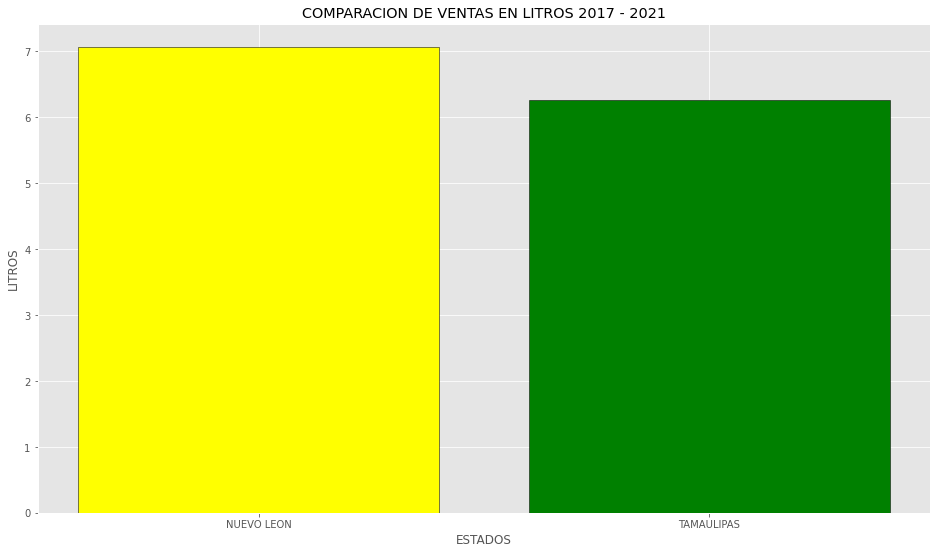

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

names_states = full_data['Estado'].unique()
df_grouped = full_data.groupby('Estado')[['Litros', '$']].mean()

# df_nl = df_grouped[df_grouped['Estado'] == 'NUEVO LEON']

df_grouped.head(10)
plt.title('COMPARACION DE VENTAS EN LITROS 2017 - 2021')
plt.bar(names_states, df_grouped['Litros'], color=['yellow', 'green'], edgecolor='black')
plt.xlabel('ESTADOS') 
plt.ylabel('LITROS') 
plt.show()


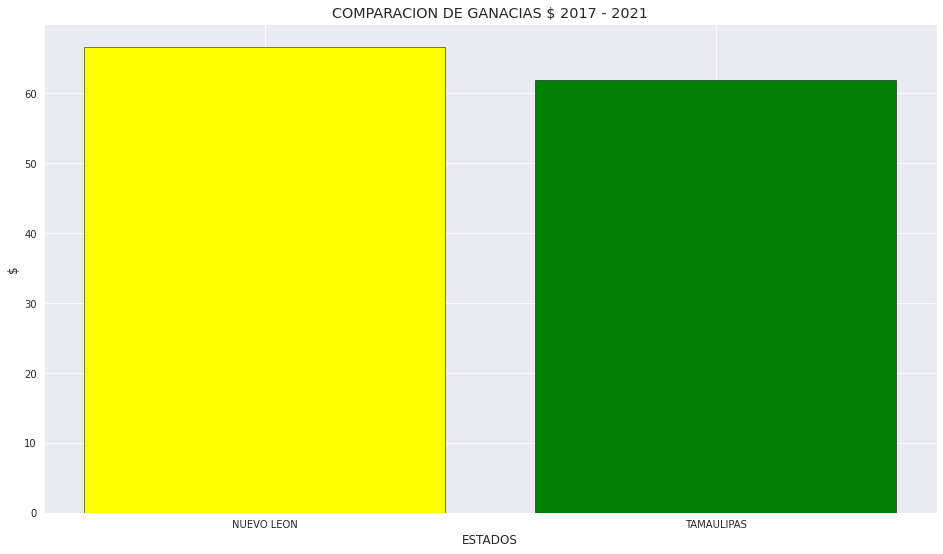

In [ ]:
plt.title('COMPARACION DE GANACIAS $ 2017 - 2022')
plt.bar(names_states, df_grouped['$'], color=['yellow', 'green'], edgecolor='black')
plt.xlabel('ESTADOS') 
plt.ylabel('$') 
plt.show()

In [ ]:
print(full_data.groupby('Estado').size())

Estado
NUEVO LEON    7327831
TAMAULIPAS    6323442
dtype: int64


In [ ]:
df_grouped_ts = full_data.groupby([pd.Grouper(key='Date', axis=0, 
                      freq='M'), 'Estado']).sum()

df_grouped_ts.reset_index(inplace=True)
df_grouped_ts['Date'] = pd.to_datetime(df_grouped_ts['Date'], format='%Y/%m/%d')

df_grouped_ts.set_index('Date')

df_grouped_ts['$/litros'] = df_grouped_ts['$'] / df_grouped_ts['Litros']
df_grouped_ts.head()

,Date,Estado,Litros,$,$/litros
0,2017-01-31,NUEVO LEON,1028948,8485138,8.246421
1,2017-01-31,TAMAULIPAS,751242,6139976,8.173100
2,2017-02-28,NUEVO LEON,903344,7690832,8.513736
3,2017-02-28,TAMAULIPAS,670787,5669465,8.451960
4,2017-03-31,NUEVO LEON,1024379,8633485,8.428018


          Date      Estado  Litros         $   $/litros
110 2021-08-31  NUEVO LEON  777379   8855228  11.391134
112 2021-09-30  NUEVO LEON  746840   9100329  12.185112
114 2021-10-31  NUEVO LEON  810484  10905142  13.455098
116 2021-11-30  NUEVO LEON  865526  11970597  13.830430
118 2021-12-31  NUEVO LEON  922500  11673984  12.654725


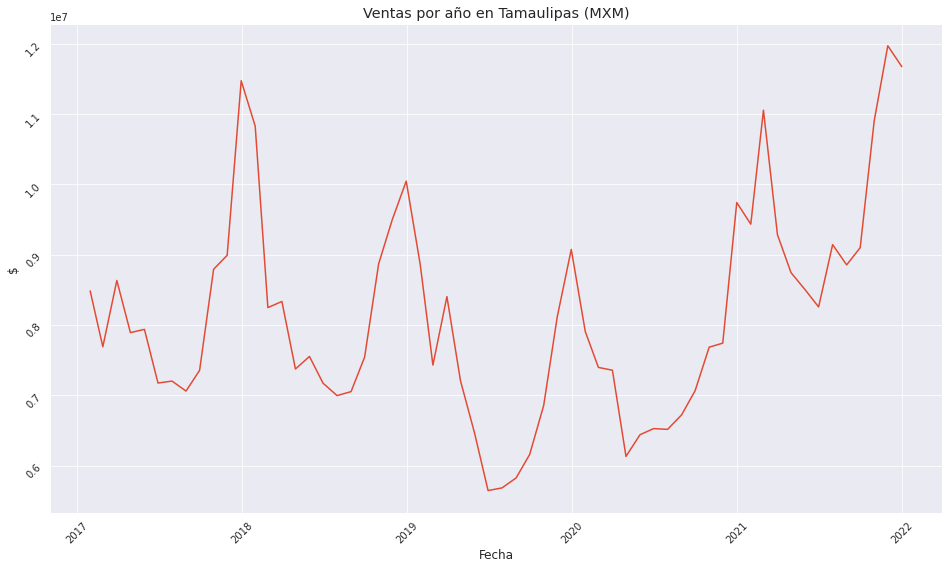

In [ ]:
df_grouped_nl_ts = df_grouped_ts[df_grouped_ts['Estado'] == 'NUEVO LEON']
print(df_grouped_nl_ts.tail())

price_nl_gas = sns.lineplot(x="Date", y="$", data=df_grouped_nl_ts)

price_nl_gas.tick_params(rotation=45)

plt.title('Ventas por año en Tamaulipas (MXM)')
plt.xlabel('Fecha')
plt.show()

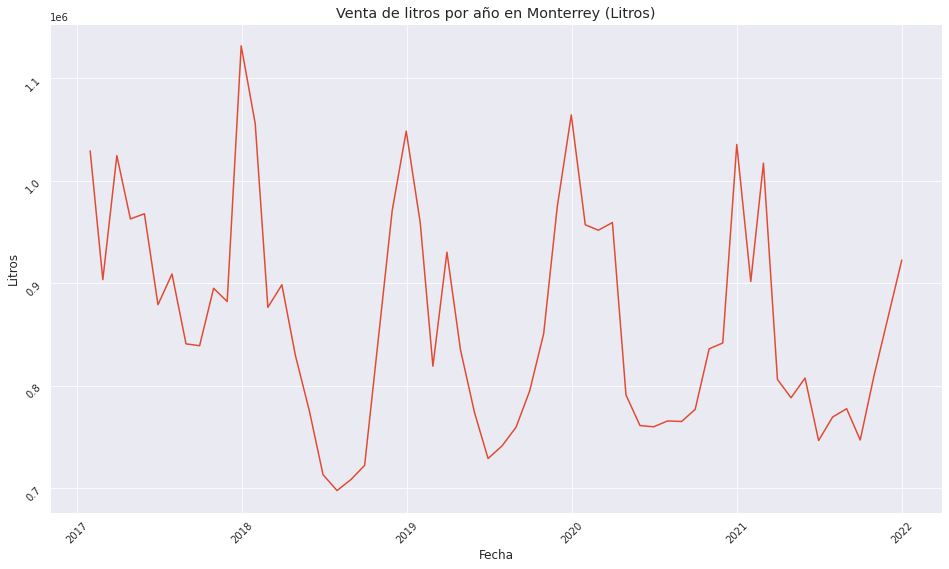

In [ ]:
liters_nl_gas = sns.lineplot(x="Date", y="Litros", data=df_grouped_nl_ts)

liters_nl_gas.tick_params(rotation=45)
plt.title('Venta de litros por año en Monterrey (Litros)')
plt.xlabel('Fecha')
plt.show()

In [ ]:
df_grouped_tm_ts = df_grouped_ts[df_grouped_ts['Estado'] == 'TAMAULIPAS']
df_grouped_tm_ts.tail()

,Date,Estado,Litros,$,$/litros
111,2021-08-31,TAMAULIPAS,530985,6360865,11.979369
113,2021-09-30,TAMAULIPAS,521427,6588765,12.636026
115,2021-10-31,TAMAULIPAS,552364,7545248,13.659920
117,2021-11-30,TAMAULIPAS,630453,8461839,13.421840
119,2021-12-31,TAMAULIPAS,701970,8299652,11.823371


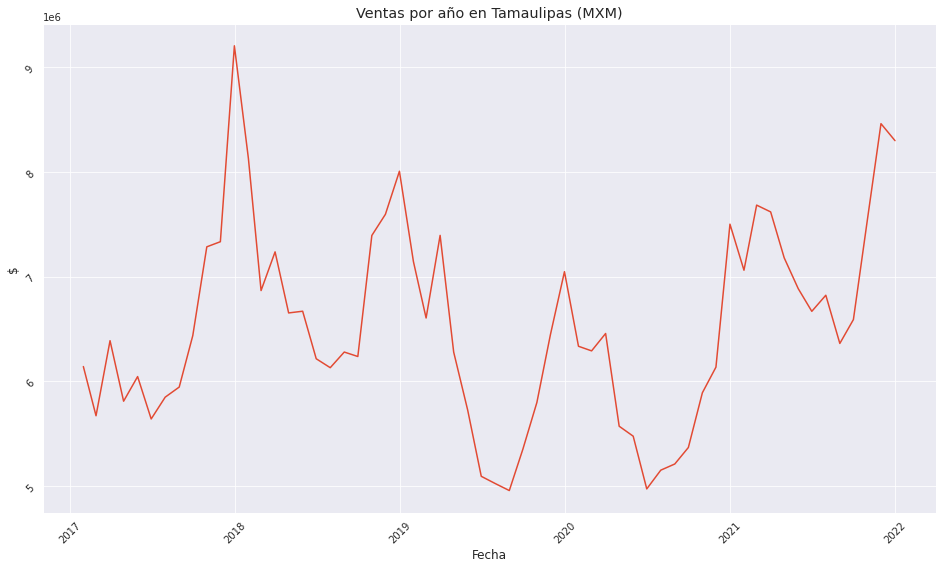

In [ ]:
liters_tm_price = sns.lineplot(x="Date", y="$", data=df_grouped_tm_ts)

liters_tm_price.tick_params(rotation=45)
plt.title('Ventas por año en Tamaulipas (MXM)')
plt.xlabel('Fecha')
plt.show()

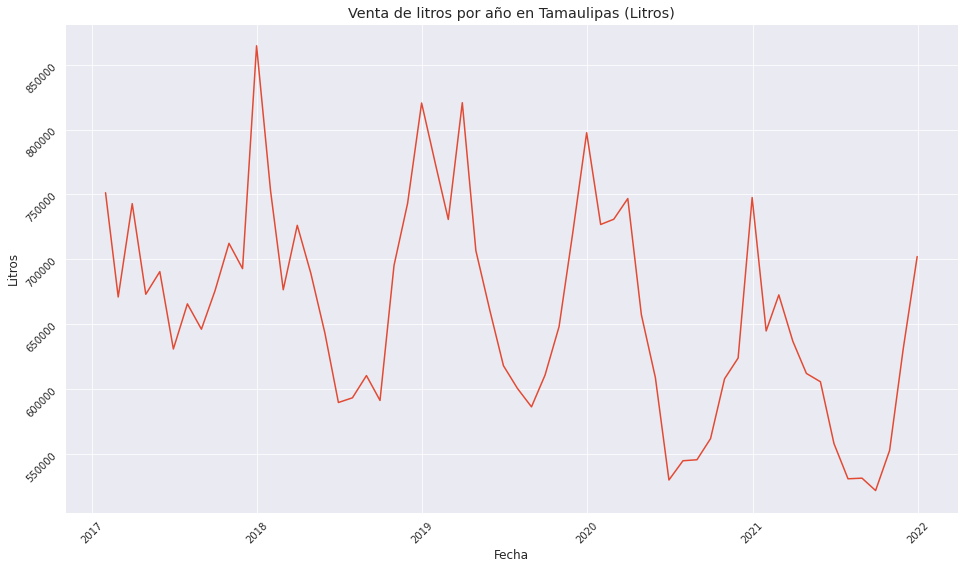

In [ ]:
liters_tm_gas = sns.lineplot(x="Date", y="Litros", data=df_grouped_tm_ts)

liters_tm_gas.tick_params(rotation=45)
plt.title('Venta de litros por año en Tamaulipas (Litros)')
plt.xlabel('Fecha')
plt.show()

In [ ]:
covid_file = os.path.join(DATA_FOLDER_PATH, 'covid', 'MEX_COVID.csv')
df_covid_raw = pd.read_csv(covid_file, low_memory=False, thousands=',')

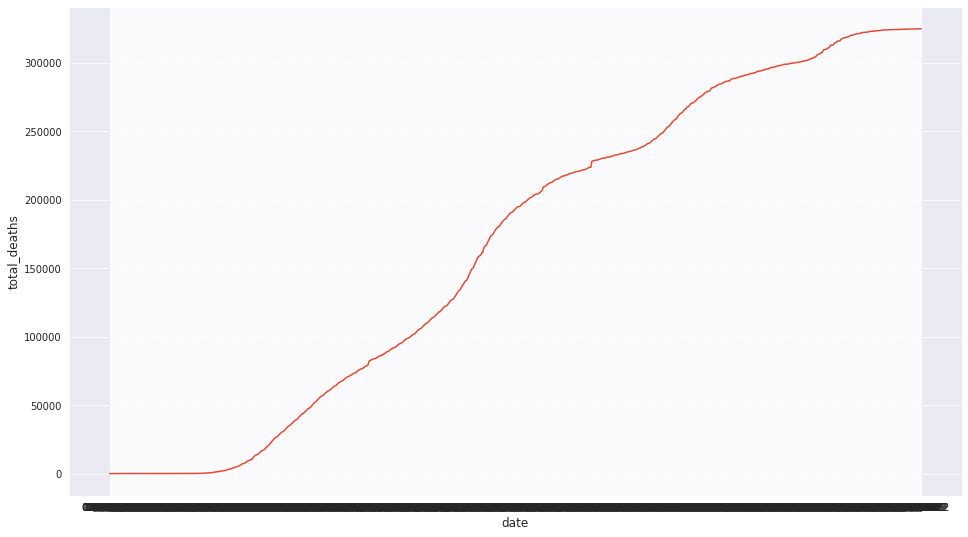

In [ ]:
df_covid = df_covid_raw[['date','total_cases', 'new_cases', 'total_deaths']]
df_covid = df_covid.fillna(0)

# df_covid = pd.to_datetime(df_covid['date'].astype(str), format = "%d/%m/%Y")

r = sns.lineplot(x="date", y="total_deaths", data=df_covid)
plt.show()

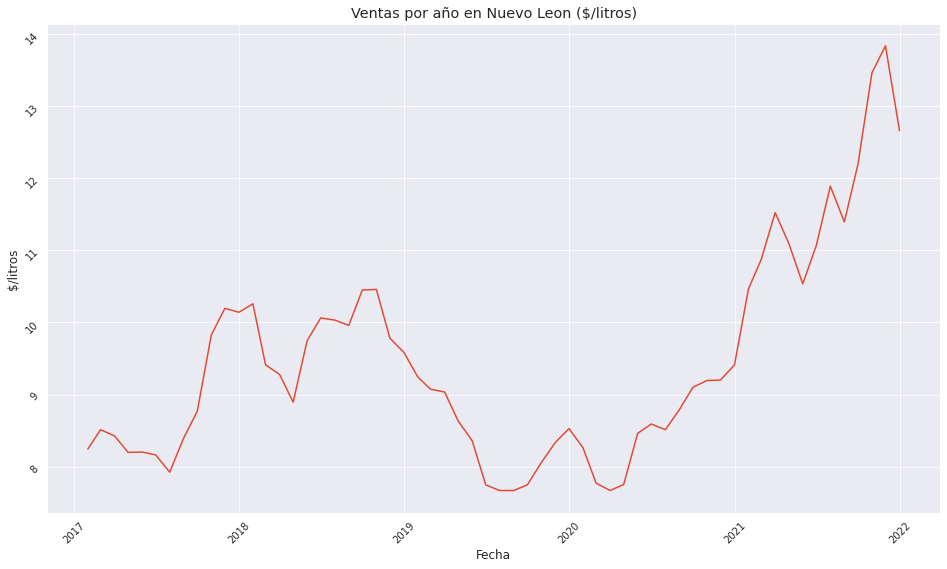

In [ ]:
price_nl_precio_gas = sns.lineplot(x="Date", y="$/litros", data=df_grouped_nl_ts)

price_nl_precio_gas.tick_params(rotation=45)

plt.title('Ventas por año en Nuevo Leon ($/litros)')
plt.xlabel('Fecha')
plt.show()

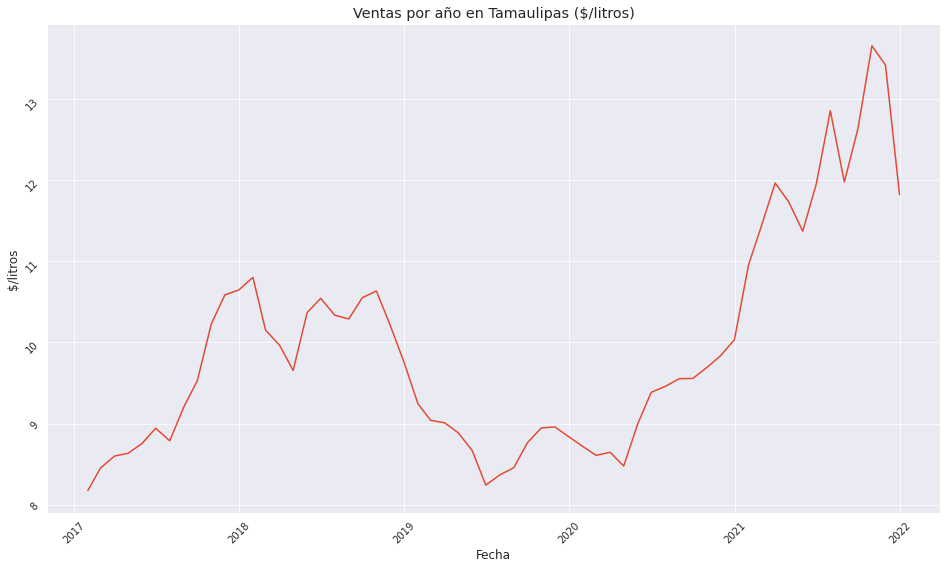

In [ ]:
price_tm_precio_gas = sns.lineplot(x="Date", y="$/litros", data=df_grouped_tm_ts)

price_tm_precio_gas.tick_params(rotation=45)

plt.title('Ventas por año en Tamaulipas ($/litros)')
plt.xlabel('Fecha')
plt.show()